#  Graduate Rotational Internship Program
# The Sparks Foundation

# Exploratory Data Analysis - Retail

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [1]:
import pandas as Pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=Pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.duplicated().sum()

17

In [7]:
data.shape

(9994, 13)

In [8]:
del data['Country']

In [9]:
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploratory Data Analysis

In [10]:
state_profit = data.groupby(['State'])[['Profit']].sum()
state_profit.sort_values(by="Profit",
         ascending=False)

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


array([[<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Postal Code'}>],
       [<AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

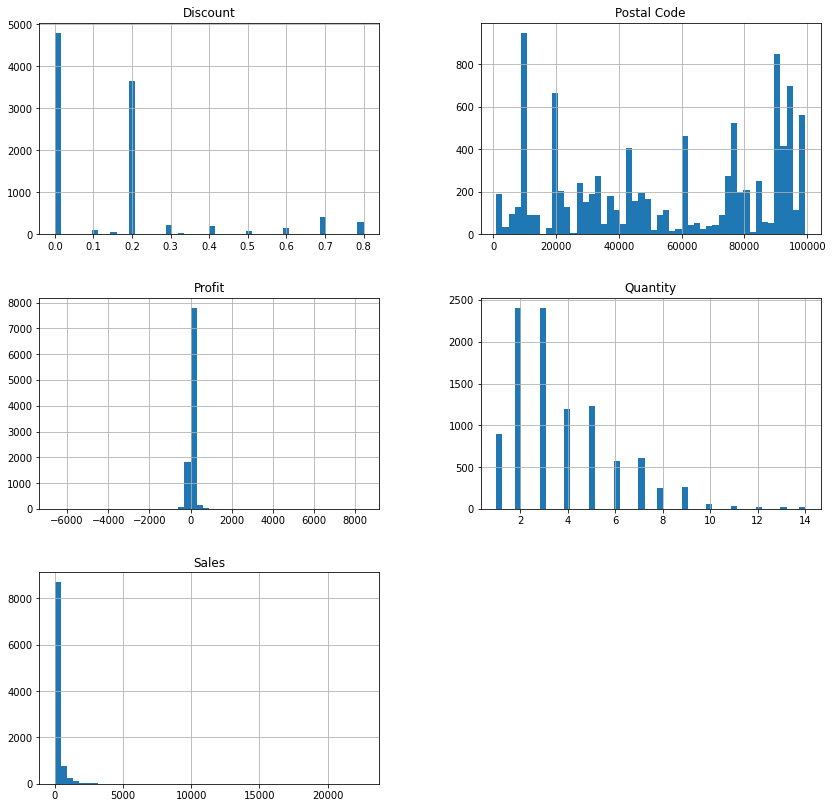

In [11]:
data.hist(bins = 50, figsize = (14,14))

c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region', ylabel='count'>

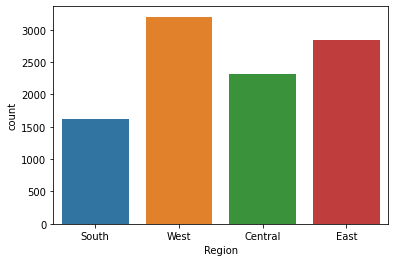

In [12]:
sns.countplot(data['Region'])

In [13]:
data.groupby(['Region']).size().reset_index(name='Count')

,Region,Count
0,Central,2323
1,East,2848
2,South,1620
3,West,3203


c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='count'>

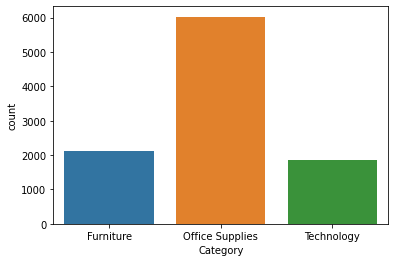

In [14]:
sns.countplot(data['Category'])

In [15]:
data.groupby(['Category']).size().reset_index(name = 'Count')

,Category,Count
0,Furniture,2121
1,Office Supplies,6026
2,Technology,1847


c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

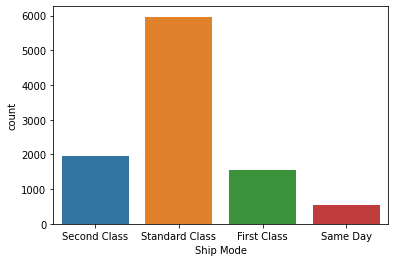

In [16]:
sns.countplot(data['Ship Mode'])

In [17]:
data.groupby(['Ship Mode']).size().reset_index(name = 'Count')

,Ship Mode,Count
0,First Class,1538
1,Same Day,543
2,Second Class,1945
3,Standard Class,5968


In [18]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

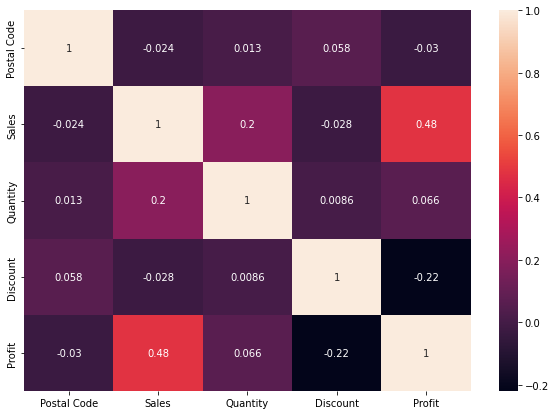

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

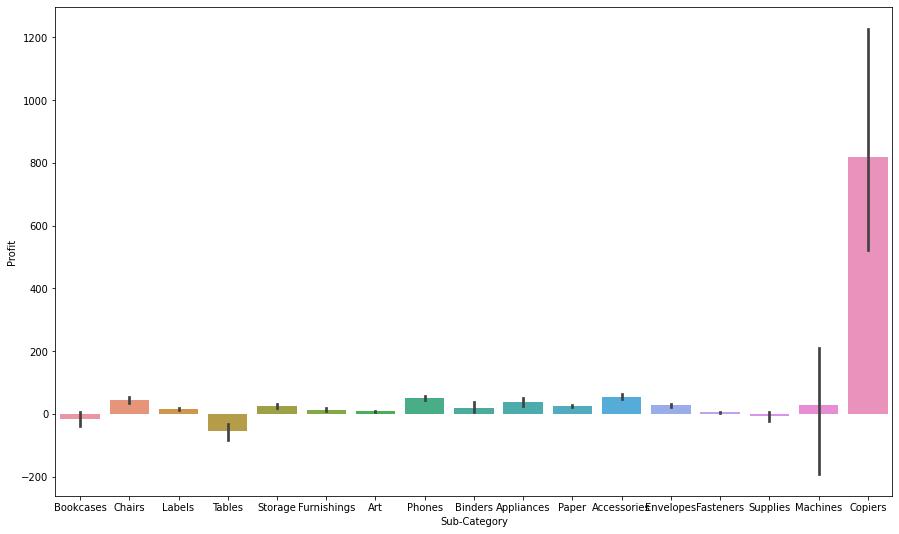

In [20]:
plt.figure(figsize=(15,9))
sns.barplot(data['Sub-Category'],data['Profit'])

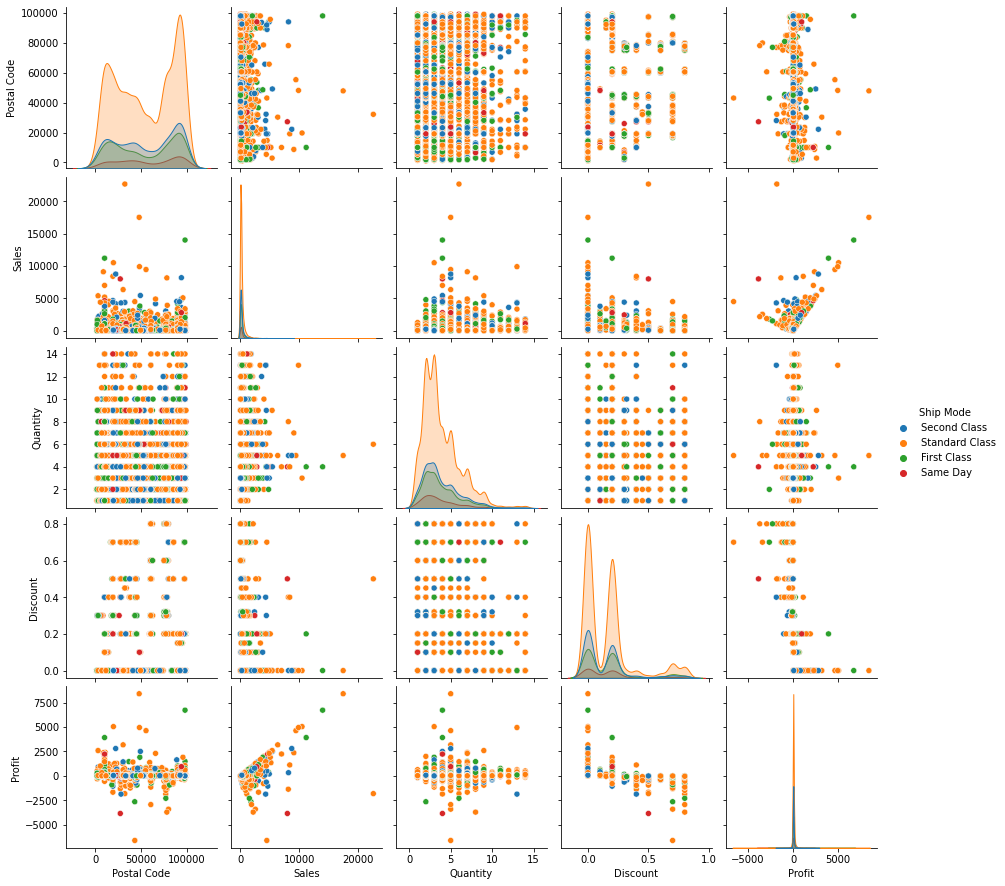

In [21]:
#pair plot for ship mode
sns.pairplot(data,hue='Ship Mode')

c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Profit'>

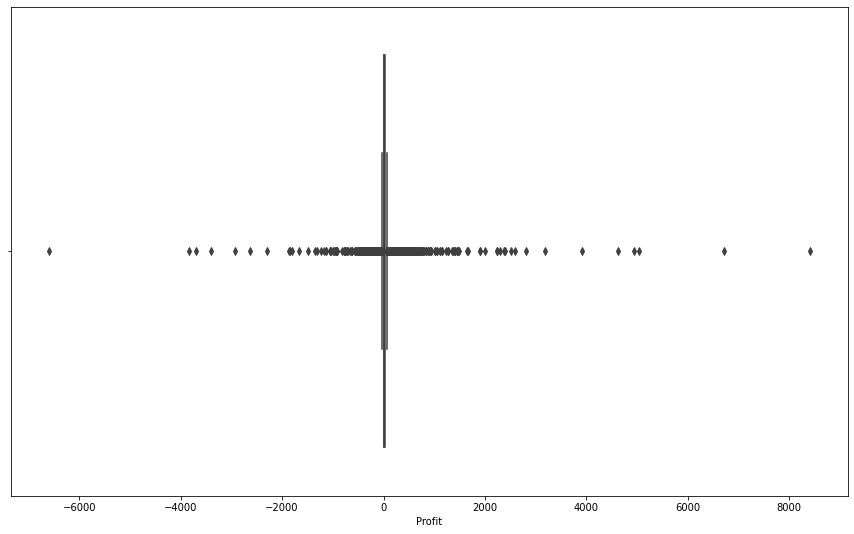

In [27]:
plt.figure(figsize=(15,9))
sns.boxplot(data['Profit'])

c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

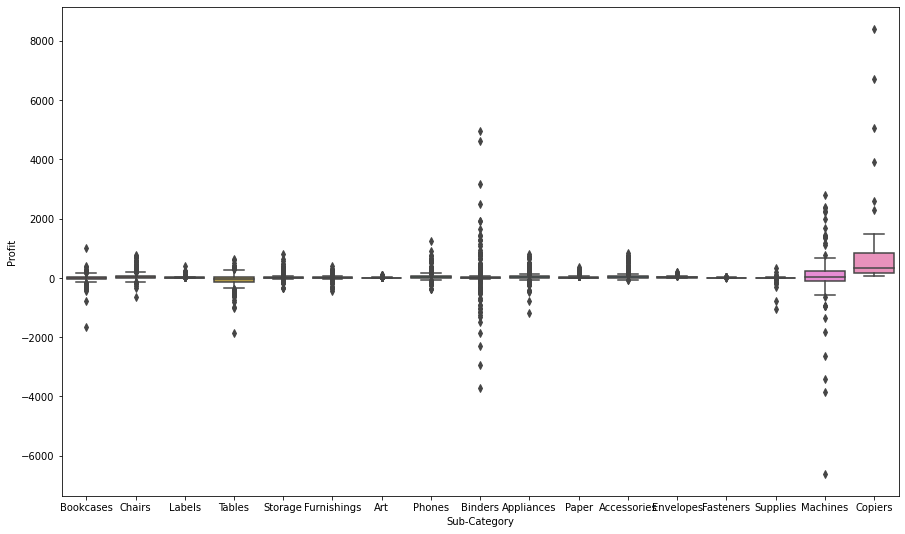

In [28]:
plt.figure(figsize=(15,9))
sns.boxplot(data['Sub-Category'],data['Profit'])

In [29]:
df_ShipMode = data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

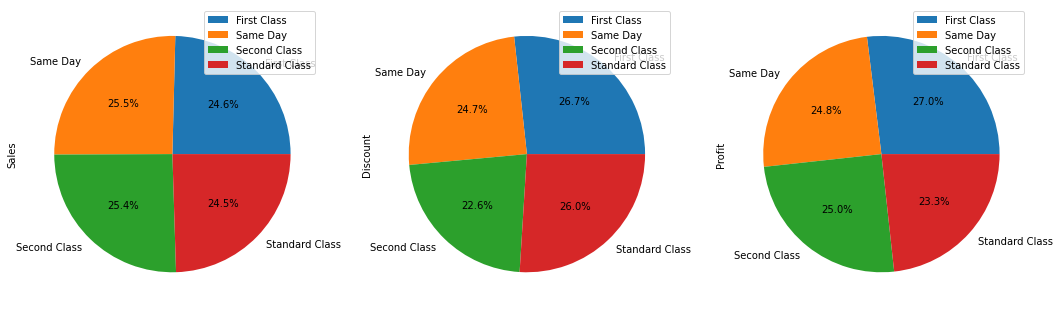

In [30]:
df_ShipMode.plot.pie(subplots = True,
                    figsize =(18,20),
                    autopct = '%1.1f%%',
                    labels =df_ShipMode.index )


In [31]:
df_Category= data.groupby(['Category'])[['Sales','Discount','Profit']].mean()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

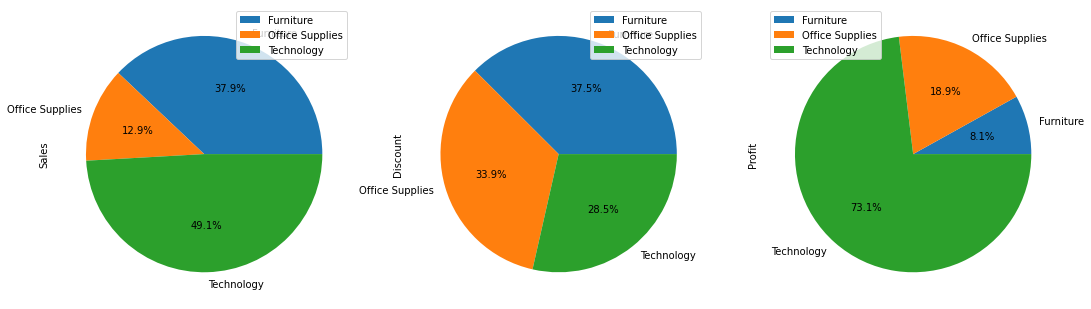

In [37]:
df_Category.plot.pie(subplots = True,
                    figsize =(18,20),
                    autopct = '%1.1f%%',
                    labels =df_Category.index )

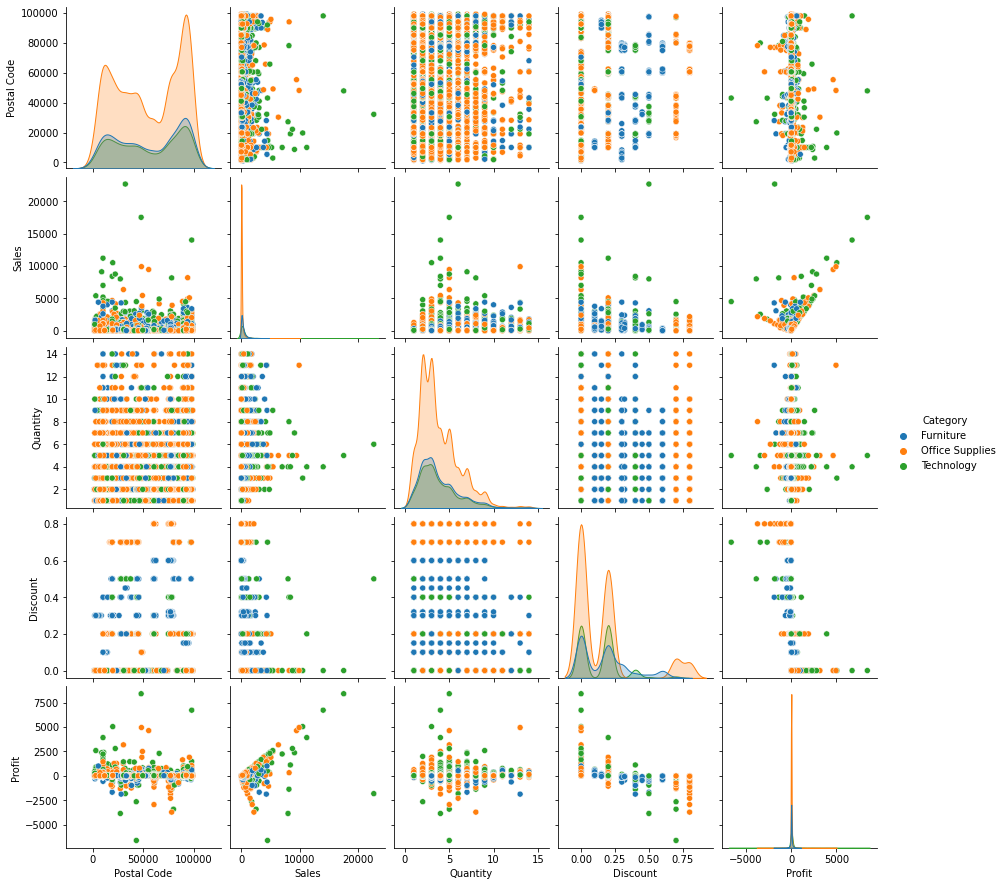

In [33]:
#pair plot for Category
sns.pairplot(data,hue='Category')

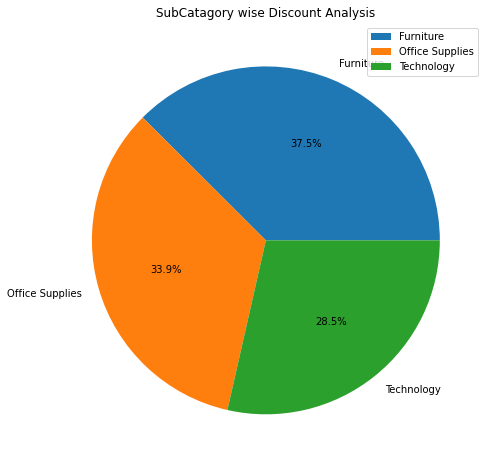

In [34]:
plt.figure(figsize=(15,8))
plt.pie(df_Category['Discount'],labels=df_Category.index,autopct = '%1.1f%%')
plt.title('SubCatagory wise Discount Analysis')
plt.legend()


c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


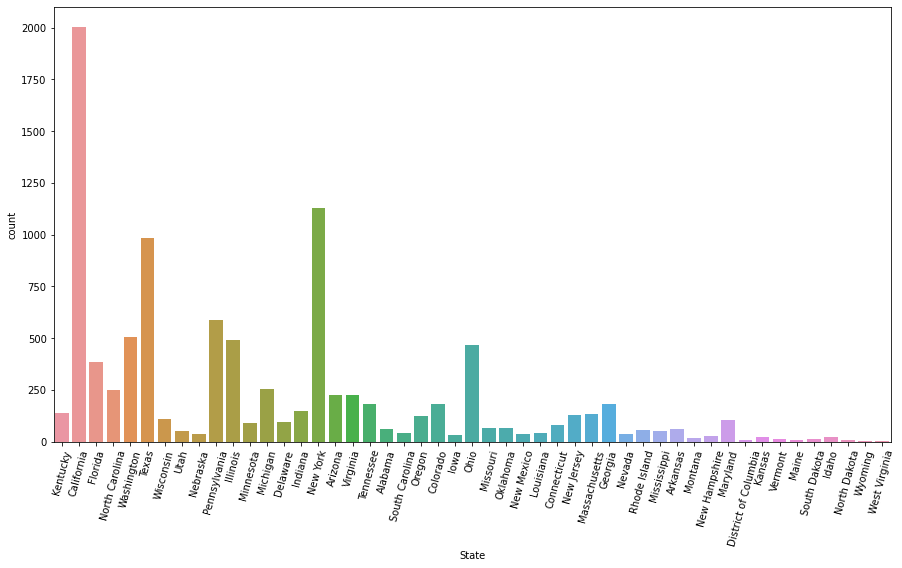

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(data['State'])
plt.xticks(rotation=75)

In [36]:
data.groupby(['State']).size().reset_index(name = 'Count')

,State,Count
0,Alabama,61
1,Arizona,224
2,Arkansas,60
3,California,2001
4,Colorado,182
5,Connecticut,82
6,Delaware,96
7,District of Columbia,10
8,Florida,383
9,Georgia,184
